
# Librosa Introduction

<font color=FA9900 size=4>LibROSA is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.</font>

#### librosa was created by Brian McFee. A large portion was ported from Dan Ellis's Matlab audio processing examples.

- Tutorial home: http://librosa.github.io/librosa/tutorial.html
- Librosa home: http://librosa.github.io/
- User forum: https://groups.google.com/forum/#!forum/librosa

In [1]:
!pip install librosa

In [2]:
import librosa
print(librosa.__version__)

0.5.1


# Documentation!

Librosa has extensive documentation with examples.

When in doubt, go to http://librosa.github.io/librosa/

# Conventions

- All data are basic `numpy` types
- **Audio buffers** are called `y`
- **Sampling rate** is called `sr`
- The last axis is time-like:
        y[1000] is the 1001st sample
        S[:, 100] is the 101st frame of S
- **Defaults** `sr=22050`, `hop_length=512`

# Load a signal

### - at its native sampling rate, use `sr=None`

In [3]:
# 1. Get the file name with path
# This is an example audio file
# filename = librosa.util.example_audio_file()

# FIRST UPLOAD audio to IBM Data Science Workbench
#filename = '/resources/data/audio/Karissa_Hobbs_-_09_-_Lets_Go_Fishin.mp3'

#filename = '/resources/data/audio/Ses02F_script01_2_M005.wav'

filename = '/resources/data/audio/VOWELS/LB4_F5R1.wav'

print(filename)

/resources/data/audio/VOWELS/LB4_F5R1.wav


### <font color=FF8800> You can get audio files at:</font>

### https://ccrma.stanford.edu/workshops/mir2014/audio/


In [4]:
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`

#y, sr = librosa.load(filename , duration=5, offset=0)

y, sr = librosa.load(filename)

print(len(y), sr)

(68907, 22050)


### - listen to the audio
<br>


<font color=magenta size=3> IPython.display.Audio </font>

#### *IPython.display.Audio* lets you play audio directly in an IPython notebook.


In [5]:
# IPython gives us an audio widget for playback
from IPython.display import Audio

Audio(data=y, rate=sr)

Resampling is easy

In [6]:
sr16 = 16000

y16 = librosa.resample(y, sr, sr16)

print(len(y16), sr16)

(50001, 16000)


In [7]:
Audio(data=y16, rate=sr16)

But what's that in seconds?

In [8]:
print(librosa.samples_to_time(len(y16), sr16))

[ 3.1250625]


# `librosa.display`

### - Plotting routines for waveforms and spectra

In [9]:
# Displays are built with matplotlib 
import matplotlib.pyplot as plt

# Let's make plots pretty
import matplotlib.style as ms
ms.use('seaborn-muted')

# Render figures interactively in the notebook
%matplotlib nbagg

# Needed from 0.5 version
import librosa.display

<IPython.core.display.Javascript object>


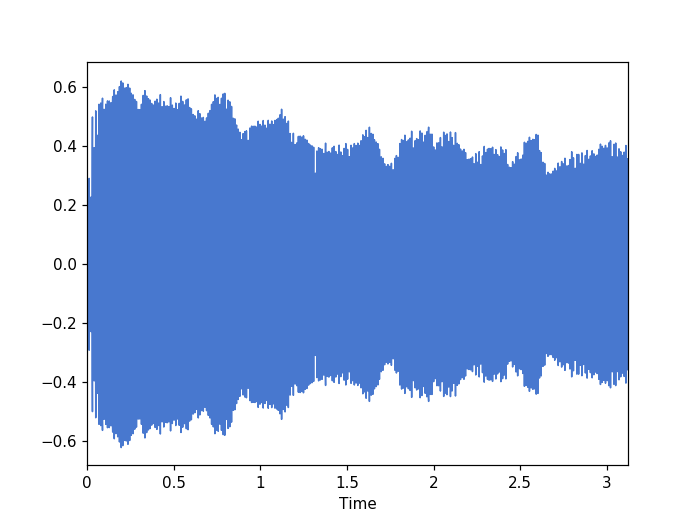

In [10]:
plt.figure()
librosa.display.waveplot(y=y16, sr=sr16)

In music processing, we often only care about the spectral magnitude and not the phase content.

The **spectrogram** ([Wikipedia](https://en.wikipedia.org/wiki/Spectrogram); FMP, p. 29, 55) shows the the intensity of frequencies over time. A spectrogram is simply the squared magnitude of the STFT:

$$ S(m, \omega) = \left| X(m, \omega) \right|^2 $$

<IPython.core.display.Javascript object>


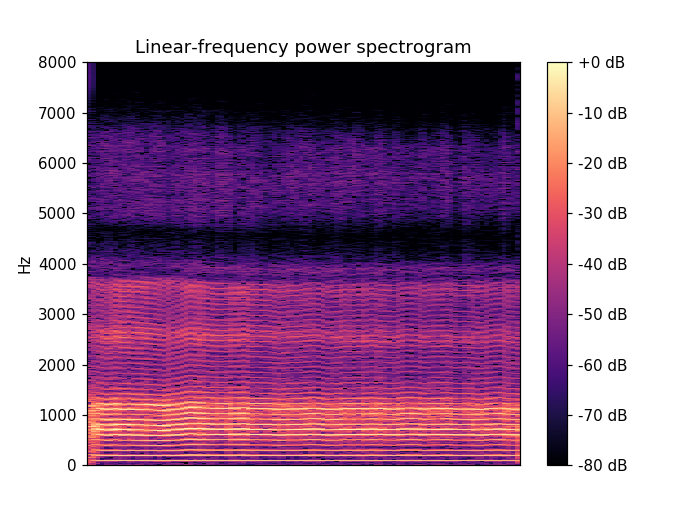

In [11]:
import numpy as np

plt.figure()

#D = librosa.amplitude_to_db(librosa.stft(y8,
#                            n_fft=2048, hop_length=32, win_length=512, window='hann'),
#                            ref=np.max)
#librosa.display.specshow(D, y_axis='linear', sr=sr8)

D = librosa.amplitude_to_db(librosa.stft(y16), ref=np.max)
librosa.display.specshow(D, sr=sr16, y_axis='linear')


plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

<IPython.core.display.Javascript object>


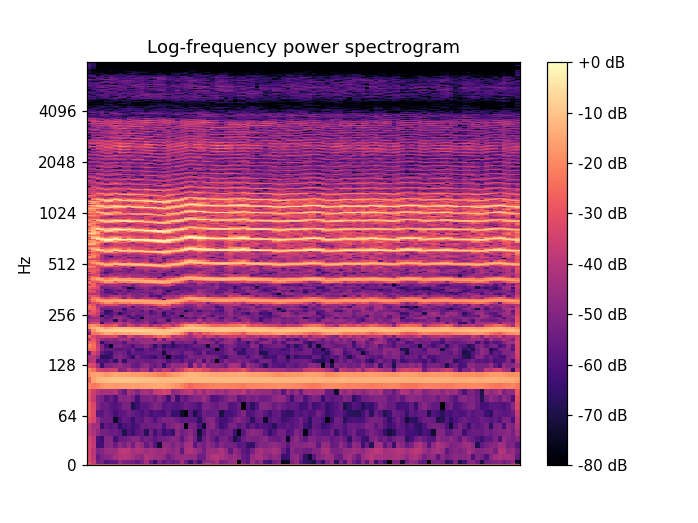

In [12]:
plt.figure()
librosa.display.specshow(D, sr=sr16, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

## Mel-spectrogram

`librosa` has some outstanding spectral representations, including [`librosa.feature.melspectrogram`](http://bmcfee.github.io/librosa/generated/librosa.feature.melspectrogram.html#librosa.feature.melspectrogram):

https://www.kaggle.com/ybonde/log-spectrogram-and-mfcc-filter-bank-example

http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html


In [31]:
64*160/16000.

0.64

In [115]:
D_short = librosa.stft(y16, n_fft=2048, hop_length=160, win_length=400)

MelS = librosa.feature.melspectrogram( \
                                      fmin=20, fmax=8000, n_mels=64, S=np.abs(D_short)**2)

MelS=20 * np.log10(MelS)

MelS_delta = librosa.feature.delta(MelS)

MelS_delta2 = librosa.feature.delta(MelS, order=2)



In [116]:
def strided_app(a, L, S ):  # Window len = L, Stride len/stepsize = S
    nrows = ((a.shape[0]-L)//S)+1
    #n = a.strides[0]
    s0,s1 = a.strides
    return np.lib.stride_tricks.as_strided(a, shape=(nrows,L,a.shape[1]), strides=(S*s0,s0,s1))

In [119]:
MelS_W=strided_app(MelS.T,L=64,S=30)
MelS_delta_W=strided_app(MelS_delta.T,L=64,S=30)
MelS_delta2_W=strided_app(MelS_delta2.T,L=64,S=30)

In [120]:
MelS_W.shape

(9, 64, 64)

In [143]:
MelS_W = np.reshape(MelS_W , (MelS_W.shape[0],MelS_W.shape[1],MelS_W.shape[2],1))
MelS_delta_W = np.reshape(MelS_delta_W , (MelS_W.shape[0],MelS_W.shape[1],MelS_W.shape[2],1))
MelS_delta2_W = np.reshape(MelS_delta2_W , (MelS_W.shape[0],MelS_W.shape[1],MelS_W.shape[2],1))

In [149]:
Features=np.append(MelS_W,MelS_delta_W,axis=3)
Features=np.append(Features,MelS_delta2_W,axis=3)

In [150]:
np.array(Features).shape

(9, 64, 64, 3)

In [139]:
a=[1,2,3]
b=[4,5,6]

In [141]:
np.append(a,b,axis=1)

IndexError: axis 1 out of bounds [0, 1)

<IPython.core.display.Javascript object>


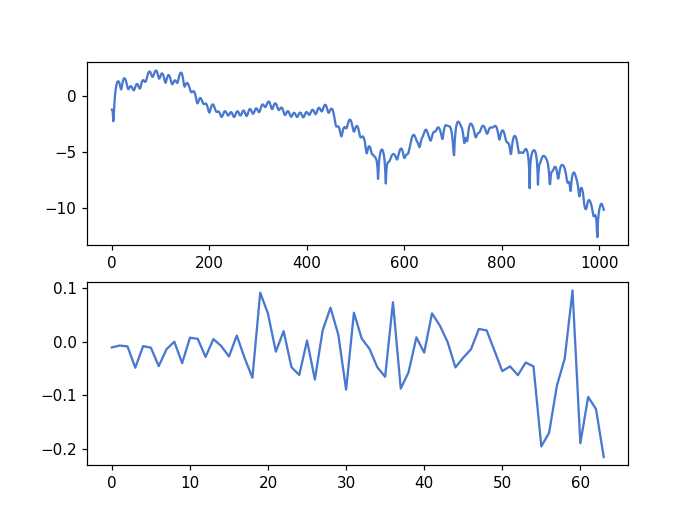

In [59]:
plt.figure()
plt.subplot(211)
plt.plot(np.log(np.abs(D_short[:,150])))
plt.subplot(212)
plt.plot(MelS_delta2[:,150])
plt.show()

In [60]:
MelS.shape

(64, 313)

In [21]:
MelS = librosa.feature.melspectrogram(y16, sr=sr16, n_fft=2048, hop_length=256, \
                                      fmin=20, fmax=8000, n_mels=64)

TypeError: mel() got an unexpected keyword argument 'win_length'

The human perception of sound intensity is logarithmic in nature. Therefore, we are often interested in the log amplitude:

In [43]:
MelS.shape

(64, 196)

<IPython.core.display.Javascript object>


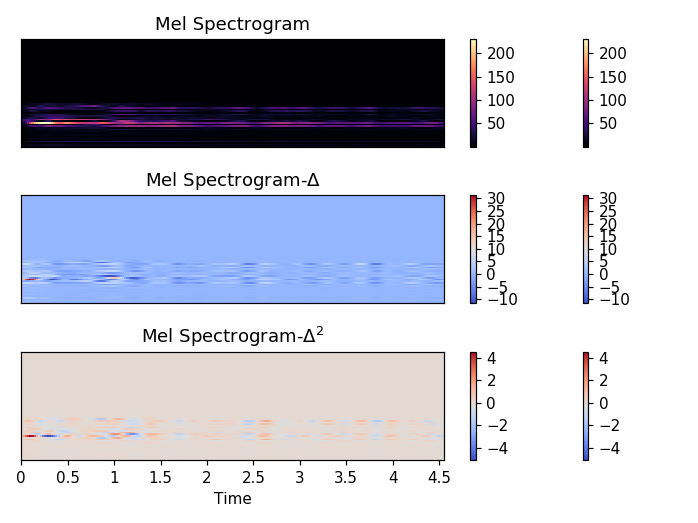

In [44]:
plt.figure()
plt.pcolor(MelS)
plt.show()

In [19]:
logS = librosa.logamplitude(MelS)

<IPython.core.display.Javascript object>


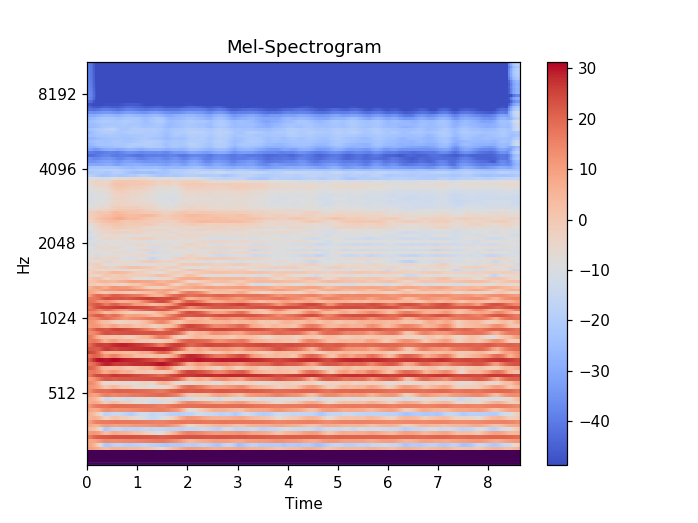

In [29]:
plt.figure()
librosa.display.specshow(logS, sr=sr16, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('Mel-Spectrogram')

# Better use?? logS = librosa.logamplitude(MelS)

Delta & Doble Delta

https://librosa.github.io/librosa/generated/librosa.feature.delta.html#librosa.feature.delta


In [45]:
MelS_delta = librosa.feature.delta(MelS)

In [46]:
MelS_delta.shape

(64, 196)

In [47]:
MelS_delta2 = librosa.feature.delta(MelS, order=2)

In [48]:
MelS_delta2.shape

(64, 196)

<IPython.core.display.Javascript object>


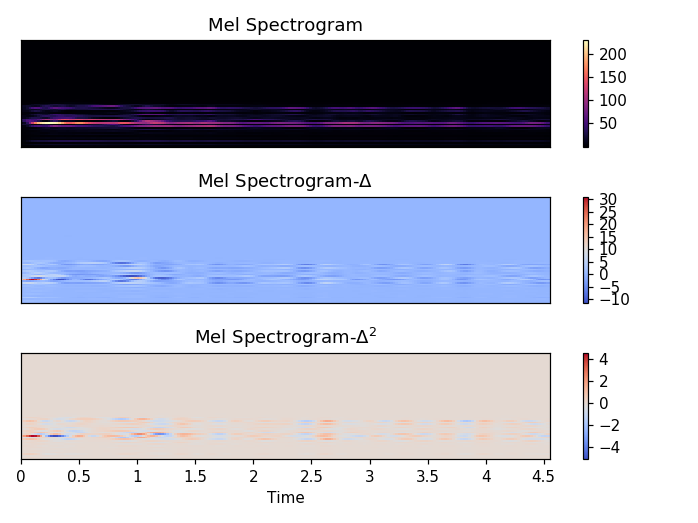

In [51]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.specshow(MelS)
plt.title('Mel Spectrogram')
plt.colorbar()
plt.subplot(3, 1, 2)
librosa.display.specshow(MelS_delta)
plt.title(r'Mel Spectrogram-$\Delta$')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(MelS_delta2, x_axis='time')
plt.title(r'Mel Spectrogram-$\Delta^2$')
plt.colorbar()
plt.tight_layout()
plt.show()

## FEATURE EXTRACTION


Look for NOTEBOOKS in

https://github.com/stevetjoa/stanford-mir/blob/gh-pages/mfcc.ipynb



In [ ]:
# Exercise 0 solution

filename = '/resources/data/audio/Karissa_Hobbs_-_09_-_Lets_Go_Fishin.mp3'

y2, sr2 = librosa.load(filename, duration=5, offset=35)
D = librosa.stft(y2, hop_length=512 )

#y2, sr2 = librosa.load(   )

#D = librosa.stft(y2, hop_length=   )

In [ ]:
plt.figure()
librosa.display.waveplot(y=y2, sr=sr2)

In [ ]:
melspec2 = librosa.feature.melspectrogram(y=y2, sr=sr2)

plt.figure()
#librosa.display.specshow(melspec2, y_axis='mel', x_axis='time')



librosa.display.specshow(librosa.power_to_db(melspec2, ref=np.max),
                         y_axis='mel', x_axis='time')

plt.colorbar()



In [ ]:
Audio(data=y2, rate=sr2)

# `librosa.feature`

- Standard features:
    - `librosa.feature.melspectrogram`
    - `librosa.feature.mfcc`
    - `librosa.feature.chroma`
    - Lots more...
- Feature manipulation:
    - `librosa.feature.stack_memory`
    - `librosa.feature.delta`

Most features work either with audio or STFT input

In [ ]:
melspec = librosa.feature.melspectrogram(y=y, sr=sr)

# Melspec assumes power, not energy as input
melspec_stft = librosa.feature.melspectrogram(S=S**2, sr=sr)

print(np.allclose(melspec, melspec_stft))

# `librosa.display`

- Plotting routines for spectra and waveforms

- **Note**: major overhaul coming in 0.5

In [ ]:
# Displays are built with matplotlib 
import matplotlib.pyplot as plt

# Let's make plots pretty
import matplotlib.style as ms
ms.use('seaborn-muted')

# Render figures interactively in the notebook
%matplotlib nbagg

# IPython gives us an audio widget for playback
from IPython.display import Audio

# Needed from 0.5 version
import librosa.display

## Waveform display

In [ ]:
plt.figure()
librosa.display.waveplot(y=y, sr=sr)

## A basic spectrogram display

In [ ]:
plt.figure()
#librosa.display.specshow(melspec, y_axis='mel', x_axis='time')


librosa.display.specshow(librosa.power_to_db(melspec, ref=np.max),
                         y_axis='mel', x_axis='time')

plt.colorbar()

## Exercise 1

* Pick a feature extractor from the `librosa.feature` submodule and plot the output with `librosa.display.specshow`


* **Bonus**: Customize the plot using either `specshow` arguments or `pyplot` functions

In [ ]:
# Exercise 1 solution

X = librosa.feature.XX()

plt.figure()

librosa.display.specshow(    )

# `librosa.beat`

- Beat tracking and tempo estimation

The beat tracker returns the estimated tempo and beat positions (measured in frames)

In [ ]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print(tempo)
print(beats)

Let's sonify it!

In [ ]:
clicks = librosa.clicks(frames=beats, sr=sr, length=len(y))

Audio(data=y + clicks, rate=sr)

Beats can be used to downsample features

In [ ]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_sync = librosa.feature.sync(chroma, beats)

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(2, 1, 1)
librosa.display.specshow(chroma, y_axis='chroma')
plt.ylabel('Full resolution')
plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_sync, y_axis='chroma')
plt.ylabel('Beat sync')

# `librosa.segment`

- Self-similarity / recurrence
- Segmentation

Recurrence matrices encode self-similarity

    R[i, j] = similarity between frames (i, j)
    
Librosa computes recurrence between `k`-nearest neighbors.

In [ ]:
R = librosa.segment.recurrence_matrix(chroma_sync)

In [ ]:
plt.figure(figsize=(4, 4))
librosa.display.specshow(R)

We can include affinity weights for each link as well.

In [ ]:
R2 = librosa.segment.recurrence_matrix(chroma_sync,
                                       mode='affinity',
                                       sym=True)

In [ ]:
plt.figure(figsize=(5, 4))
librosa.display.specshow(R2)
plt.colorbar()

## Exercise 2

* Plot a recurrence matrix using different  features
* **Bonus**: Use a custom distance metric

In [ ]:
# Exercise 2 solution

# `librosa.decompose`

- `hpss`: Harmonic-percussive source separation
- `nn_filter`: Nearest-neighbor filtering, non-local means, Repet-SIM
- `decompose`: NMF, PCA and friends

Separating harmonics from percussives is easy

In [ ]:
D_harm, D_perc = librosa.decompose.hpss(D)

y_harm = librosa.istft(D_harm)

y_perc = librosa.istft(D_perc)

In [ ]:
Audio(data=y_harm, rate=sr)

In [ ]:
Audio(data=y_perc, rate=sr)

NMF is pretty easy also!

In [ ]:
# Fit the model
W, H = librosa.decompose.decompose(S, n_components=16, sort=True)

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1), plt.title('W')
librosa.display.specshow(librosa.logamplitude(W**2), y_axis='log')
plt.subplot(1, 2, 2), plt.title('H')
librosa.display.specshow(H, x_axis='time')

In [ ]:
# Reconstruct the signal using only the first component
S_rec = W[:, :1].dot(H[:1, :])

y_rec = librosa.istft(S_rec * phase)

In [ ]:
Audio(data=y_rec, rate=sr)

## Exercise 3

- Compute a chromagram using only the harmonic component
- **Bonus**: run the beat tracker using only the percussive component

# Wrapping up

- This was just a brief intro, but there's lots more!

- Read the docs: http://librosa.github.io/librosa/
- And the example gallery: http://librosa.github.io/librosa_gallery/
- We'll be sprinting all day.  Get involved! https://github.com/librosa/librosa/issues/395